## Binh and Korn function 

Problem taken from \[Binh T. and Korn U. (1997) MOBES: A Multiobjective Evolution Strategy for Constrained Optimization Problems. In: Proceedings of the Third International Conference on Genetic Algorithms. Czech Republic. pp. 176–182\], defined as follows:

---

*Minimize*

$f_1 (x_1,x_2) = 4x_1^2+4x_2^2$

$f_2 (x_1,x_2) = (x_1 - 5)^2+(x_2-5)^2$

*subjected to*

$(x_1 - 5)^2+x_2^2 \le 25$

$(x_1 - 8)^2+(x_2+3)^2 \ge 7.7$

*in the domain*

$0 \le x_1 \le 5$

$0 \le x_2 \le 3$

In [1]:
from mosa import Anneal
from time import time
%matplotlib inline

### Translates the Binh and Korn problem into Python code

In the Python function *fobj* below, $f_1$ and $f_2$ are the functions to be minimized. The argument of the Python function is a dictionary with two keys, $X_1$ and $X_2$, representing a temptative solution to the problem. The constraints are defined as $c_1$ and $c_2$.If they are not satisfied, an *ad hoc* dominated solution is defined, considering the Pareto front from a previous unconstrained run.

In [2]:
def fobj(solution):
    f1=4.0*(pow(solution["X1"][0],2)+pow(solution["X2"][0],2))
    f2=pow((solution["X1"][0]-5),2)+pow((solution["X2"][0]-5),2)
    c1=pow((solution["X1"][0]-5),2)+pow((solution["X2"][0]),2)
    c2=pow((solution["X1"][0]-8),2)+pow((solution["X2"][0]+3),2)

    if c1>25.0 or c2<7.7:
        f1=60.0
        f2=20.0
    
    return [f1,f2]

### Initialization

First, a population is defined. The population is a dictionary and its keys are the keys that will be present in the temptative solutions to the problem. In the case of the Binh and Korn problem, we used two keys, $X_1$ and $X_2$. Since the solution space is continuous for $X_1$ and $X_2$ in the domain defined above, both keys are set to empty dictionaries.

Then, an Anneal object is created with initial definitions. Particularly important, the definitions related to the archive  used to store the best solutions (e.g., archive size) are set by the *setarchiveconfig* function.

In [3]:
population={"X1":[],"X2":[]}
opt=Anneal()
opt.setpopulation(population)
opt.setarchiveconfig(archivesize=10000,maxarchivereject=100000)
opt.setalpha(0.0)

--------------------------------------------------
    MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA)    
--------------------------------------------------
Developed by Dr. Roberto Gomes de Aguiar Veiga
Universidade Federal do ABC, Brazil


Setting population...
Done!
Setting archive configurations...
Done!
Setting alpha...
Done!


### Hot run

A first run starting at very high temperatures (1000) is performed. This initial "hot run" apparently helps the algorithm not to be trapped in specific regions of the solution space, which ends up in the algorithm missing the Pareto front. The optimization algorithm itself is carried out by the function *evolve*, which takes the *fobj* function above as argument.

Please pay attention to arguments of *settemp* and *setxconfig* functions.

In [4]:
opt.settemp(initemp=1000.0,decrease=0.95,niter=1000,ntemp=100)
opt.setxconfig(xnel={"X1":1,"X2":1},
               xstep={"X1":0.5,"X2":0.3},
               exchangeprob={"X1":1.0,"X2":1.0},
               xbounds={"X1":[0.0,5.0],"X2":[0.0,3.0]})
start=time()
opt.evolve(fobj)

Setting temperature...
Done!
Setting solution configurations...
Done!
--- BEGIN: Evolving a solution ---

Initializing archive...
Empty archive!
Done!
Looking for a solution in the checkpoint file...
No checkpoint file!
Done!
------
Population/solution keys:
    ['X1']:
        Number of elements in the population: 0
        (Continuous sampling space)
        Boundaries: [0.0000,5.0000]
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to choose a new value in the solution: 0.500000
    ['X2']:
        Number of elements in the population: 0
        (Continuous sampling space)
        Boundaries: [0.0000,3.0000]
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability 

    Number of accepted moves: 971.
    Fraction of accepted moves: 0.971000.
    Number of archive updates: 51.
    Fraction of archive updates in accepted moves: 0.052523.
------
TEMPERATURE: 166.083384
    Number of accepted moves: 980.
    Fraction of accepted moves: 0.980000.
    Number of archive updates: 59.
    Fraction of archive updates in accepted moves: 0.060204.
------
TEMPERATURE: 157.779215
    Number of accepted moves: 977.
    Fraction of accepted moves: 0.977000.
    Number of archive updates: 55.
    Fraction of archive updates in accepted moves: 0.056295.
------
TEMPERATURE: 149.890254
    Number of accepted moves: 979.
    Fraction of accepted moves: 0.979000.
    Number of archive updates: 56.
    Fraction of archive updates in accepted moves: 0.057201.
------
TEMPERATURE: 142.395741
    Number of accepted moves: 975.
    Fraction of accepted moves: 0.975000.
    Number of archive updates: 67.
    Fraction of archive updates in accepted moves: 0.068718.
------
TEMP

    Number of accepted moves: 896.
    Fraction of accepted moves: 0.896000.
    Number of archive updates: 58.
    Fraction of archive updates in accepted moves: 0.064732.
------
TEMPERATURE: 20.276547
    Number of accepted moves: 882.
    Fraction of accepted moves: 0.882000.
    Number of archive updates: 77.
    Fraction of archive updates in accepted moves: 0.087302.
------
TEMPERATURE: 19.262720
    Number of accepted moves: 879.
    Fraction of accepted moves: 0.879000.
    Number of archive updates: 46.
    Fraction of archive updates in accepted moves: 0.052332.
------
TEMPERATURE: 18.299584
    Number of accepted moves: 846.
    Fraction of accepted moves: 0.846000.
    Number of archive updates: 37.
    Fraction of archive updates in accepted moves: 0.043735.
------
TEMPERATURE: 17.384605
    Number of accepted moves: 863.
    Fraction of accepted moves: 0.863000.
    Number of archive updates: 58.
    Fraction of archive updates in accepted moves: 0.067207.
------
TEMPERAT

### Cold run

After the "hot run", a "cold run" starting at a much lower temperature (1.0) is performed to allow the solutions to relax to the vicinity of the Pareto front. Notice that in the *setxconfig* function the step size was also decreased.

Solutions produced by the "hot run" were taken from the archive.

In [5]:
opt.settemp(initemp=1.0,decrease=0.95,niter=1000,ntemp=100)
opt.setxconfig(xnel={"X1":1,"X2":1},
               xstep={"X1":0.05,"X2":0.03},
               exchangeprob={"X1":1.0,"X2":1.0},
               xbounds={"X1":[0.0,5.0],"X2":[0.0,3.0]})
opt.evolve(fobj)
end=time()

Setting temperature...
Done!
Setting solution configurations...
Done!
--- BEGIN: Evolving a solution ---

Initializing archive...
Archive loaded from archive.json!
Done!
Looking for a solution in the checkpoint file...
Done!
------
Population/solution keys:
    ['X1']:
        Number of elements in the population: 0
        (Continuous sampling space)
        Boundaries: [0.0000,5.0000]
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to choose a new value in the solution: 0.050000
    ['X2']:
        Number of elements in the population: 0
        (Continuous sampling space)
        Boundaries: [0.0000,3.0000]
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability o

------
TEMPERATURE: 0.166083
    Number of accepted moves: 477.
    Fraction of accepted moves: 0.477000.
    Number of archive updates: 57.
    Fraction of archive updates in accepted moves: 0.119497.
------
TEMPERATURE: 0.157779
    Number of accepted moves: 444.
    Fraction of accepted moves: 0.444000.
    Number of archive updates: 29.
    Fraction of archive updates in accepted moves: 0.065315.
------
TEMPERATURE: 0.149890
    Number of accepted moves: 439.
    Fraction of accepted moves: 0.439000.
    Number of archive updates: 102.
    Fraction of archive updates in accepted moves: 0.232346.
------
TEMPERATURE: 0.142396
    Number of accepted moves: 405.
    Fraction of accepted moves: 0.405000.
    Number of archive updates: 9.
    Fraction of archive updates in accepted moves: 0.022222.
------
TEMPERATURE: 0.135276
    Number of accepted moves: 373.
    Fraction of accepted moves: 0.373000.
    Number of archive updates: 24.
    Fraction of archive updates in accepted moves: 

    Number of accepted moves: 52.
    Fraction of accepted moves: 0.052000.
    No archive update.
------
TEMPERATURE: 0.014160
    Number of accepted moves: 55.
    Fraction of accepted moves: 0.055000.
    No archive update.
------
TEMPERATURE: 0.013452
    Number of accepted moves: 42.
    Fraction of accepted moves: 0.042000.
    No archive update.
------
TEMPERATURE: 0.012779
    Number of accepted moves: 43.
    Fraction of accepted moves: 0.043000.
    No archive update.
------
TEMPERATURE: 0.012140
    Number of accepted moves: 46.
    Fraction of accepted moves: 0.046000.
    No archive update.
------
TEMPERATURE: 0.011533
    Number of accepted moves: 40.
    Fraction of accepted moves: 0.040000.
    No archive update.
------
TEMPERATURE: 0.010957
    Number of accepted moves: 46.
    Fraction of accepted moves: 0.046000.
    No archive update.
------
TEMPERATURE: 0.010409
    Number of accepted moves: 40.
    Fraction of accepted moves: 0.040000.
    No archive update.
-----

#### How long did the optimization process take?

In [6]:
print("   Elapsed time: %f s" % (end-start))

   Elapsed time: 329.668649 s


### Output

After eliminating the dominated solutions, the non-dominated solutions and respective values are printed and the resulting Pareto front is displayed.

In [7]:
purged=opt.purgedominated()
opt.printx(purged)

===
Solutions:
1) {'X1': [2.491226651487584], 'X2': [2.463338373056508]}
2) {'X1': [2.7234349875203336], 'X2': [2.707422126454932]}
3) {'X1': [2.638979497788769], 'X2': [2.707422126454932]}
4) {'X1': [0.24018748591691275], 'X2': [0.2647471040699022]}
5) {'X1': [2.570043408532923], 'X2': [2.506947575935446]}
6) {'X1': [2.570043408532923], 'X2': [2.5422196461681414]}
7) {'X1': [2.570043408532923], 'X2': [2.5560820724375173]}
8) {'X1': [2.9868404193620206], 'X2': [2.9872818167225064]}
9) {'X1': [2.9820633631816955], 'X2': [2.9872818167225064]}
10) {'X1': [3.1176766580702666], 'X2': [2.9872818167225064]}
11) {'X1': [3.2719697713085294], 'X2': [2.9549928388086415]}
12) {'X1': [2.873386753024867], 'X2': [2.89105707591876]}
13) {'X1': [2.656656761812405], 'X2': [2.732416047365187]}
14) {'X1': [0.4775394604599612], 'X2': [0.4429418450105235]}
15) {'X1': [1.491285890784591], 'X2': [1.499238963677632]}
16) {'X1': [2.0291292426246166], 'X2': [1.9800461926433583]}
17) {'X1': [2.4720121685482033], 

3518) {'X1': [1.0422392923658863], 'X2': [1.0336750765309528]}
3519) {'X1': [1.0422392923658863], 'X2': [1.0298835935035153]}
3520) {'X1': [0.9741347753232562], 'X2': [0.9431134087682684]}
3521) {'X1': [0.9075227847187232], 'X2': [0.9138838351056999]}
3522) {'X1': [0.9075227847187232], 'X2': [0.8890842112826178]}
3523) {'X1': [0.9037350755031501], 'X2': [0.8890842112826178]}
3524) {'X1': [0.855445469445197], 'X2': [0.8890842112826178]}
3525) {'X1': [0.855445469445197], 'X2': [0.8897868047105493]}
3526) {'X1': [0.855445469445197], 'X2': [0.8799548987703115]}
3527) {'X1': [0.8548840026281422], 'X2': [0.8791261710247329]}
3528) {'X1': [0.821636287577709], 'X2': [0.8534539782329638]}
3529) {'X1': [0.821636287577709], 'X2': [0.8378126402339343]}
3530) {'X1': [0.8252696261096815], 'X2': [0.8378126402339343]}
3531) {'X1': [0.8252696261096815], 'X2': [0.8284363671915127]}
3532) {'X1': [0.8626563652640471], 'X2': [0.8284363671915127]}
3533) {'X1': [0.844078415699426], 'X2': [0.8284363671915127]

6079) {'X1': [1.044243800424794], 'X2': [1.0523202102579028]}
6080) {'X1': [1.049118430316564], 'X2': [1.0523202102579028]}
6081) {'X1': [1.063386935108876], 'X2': [1.0523202102579028]}
6082) {'X1': [1.0724030434891476], 'X2': [1.0531998578684763]}
6083) {'X1': [1.0508895840944341], 'X2': [1.0531998578684763]}
6084) {'X1': [1.0508895840944341], 'X2': [1.0384297063733086]}
6085) {'X1': [1.0827810672152862], 'X2': [1.0671456363505132]}
6086) {'X1': [1.0827810672152862], 'X2': [1.0664625743739369]}
6087) {'X1': [1.015357331292886], 'X2': [1.0010652273192673]}
6088) {'X1': [1.015357331292886], 'X2': [1.008942944645545]}
6089) {'X1': [1.0198207914985244], 'X2': [1.0215320086029265]}
6090) {'X1': [1.0193609391046388], 'X2': [1.0215320086029265]}
6091) {'X1': [0.9768397997155955], 'X2': [0.9933027052783338]}
6092) {'X1': [0.9350249148813922], 'X2': [0.9521888642420061]}
6093) {'X1': [0.9350249148813922], 'X2': [0.9518188656686554]}
6094) {'X1': [0.9630948631669245], 'X2': [0.9518188656686554]

1243) [13.810166550880837, 27.181832077412555]
1244) [12.990830881097192, 27.762287644934826]
1245) [12.774768040328503, 27.92043023423588]
1246) [25.39047485109377, 20.744254841786944]
1247) [27.139267301754288, 19.949414354409626]
1248) [33.17104181010659, 17.56951526791189]
1249) [44.277597103978515, 14.018869310501561]
1250) [1.3988627261380517, 41.986519212641106]
1251) [1.5461295817779268, 41.60453602906468]
1252) [3.0143567539280887, 38.4802645219676]
1253) [2.8112392194715135, 38.84763370785578]
1254) [38.718724801171334, 15.682295885840137]
1255) [50.0396822314281, 12.49488384032012]
1256) [31.15894182790855, 18.319054795734296]
1257) [65.51148234077698, 9.145294664461211]
1258) [41.408273671038245, 14.853185111427901]
1259) [35.83657741225648, 16.63625670803433]
1260) [36.04704576338692, 16.562612669769294]
1261) [35.613068951471746, 16.715309236549707]
1262) [37.54018544741383, 16.075012158594422]
1263) [36.21530924014715, 16.50109861402192]
1264) [41.6714886376902, 14.79055

4742) [14.98953422987936, 26.371617388858986]
4743) [14.676367830129793, 26.58011803073471]
4744) [14.505028325895118, 26.69680077645521]
4745) [14.692313660313241, 26.569354592865608]
4746) [15.026525454678772, 26.348745029897295]
4747) [15.002259685811918, 26.364537954233505]
4748) [14.759071550769491, 26.52474649597898]
4749) [14.504364062257089, 26.698632579695634]
4750) [14.597798607193884, 26.63620680317048]
4751) [14.567147544279734, 26.653824504888693]
4752) [14.398547912597623, 26.76826909687066]
4753) [14.485182504647337, 26.70965999889568]
4754) [14.575848854652081, 26.64883013305485]
4755) [14.626440413057944, 26.615109066658118]
4756) [14.805226812080598, 26.497187537904946]
4757) [14.804262268399482, 26.49781858607139]
4758) [15.02354871285426, 26.349320980839217]
4759) [15.091742031630176, 26.30375895620972]
4760) [15.09059137734125, 26.304511838354067]
4761) [15.11995891020783, 26.28497881964646]
4762) [15.11743980506719, 26.28662736345261]
4763) [14.969959137877474, 26

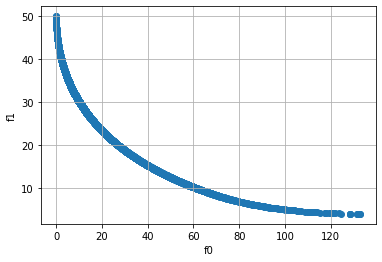

In [8]:
opt.plotfront()